In [100]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import yfinance as yf

In [115]:
stock_symbol="SBIN.NS"
# import seaborn as sns

start_date='2020-06-01'
end_date='2022-06-23'
df =yf.download(stock_symbol, str(start_date), str(end_date))
# df.reset_index(inplace=True)
# df=pd.DataFrame({'Date':df1.index, 'Close':df1['Close'],'Open':df1['Open'],'High':df1['High'],'Low':df1['Low'],'Adj Close':df1['Adj Close'],'Volume':df1['Volume']})
# df=df1[['Date','Close','Open','High','Low','Adj Close','Volume']]
# df=df.drop(['Date'],axis=1)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-01,164.000000,171.399994,163.350006,170.050003,165.905243,92740893
2020-06-02,169.899994,171.300003,167.199997,170.250000,166.100357,70419104
2020-06-03,172.500000,179.899994,172.000000,174.899994,170.637024,113168889
2020-06-04,174.899994,177.649994,171.500000,174.050003,169.807739,83494674
2020-06-05,176.550003,189.800003,176.000000,187.800003,183.222610,201321234
...,...,...,...,...,...,...
2022-06-16,455.149994,457.750000,440.149994,441.600006,441.600006,10780703
2022-06-17,440.000000,447.549988,437.250000,441.000000,441.000000,14326050
2022-06-20,441.500000,443.450012,430.700012,434.700012,434.700012,12368534


In [116]:
# df = yf.download(tickers=stock_symbol,period='2y')
# df.index=df['Date'] 
# df['MA100']=df.Close.rolling(100).mean()
# df['MA200']=df.Close.rolling(200).mean()
# df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()
# df = df.assign(VWAP=df.eval('wgtd = Close * Volume', inplace=False).cumsum().eval('wgtd / Volume'))
# # df=df.drop(['Open', 'High','Low','Adj Close','Volume'], axis = 1)
# df=df.dropna()
# df

In [117]:
df.reset_index(inplace=True)

In [149]:
train_dates = pd.to_datetime(df['Date'])
cols = list(df)[1:7]
df_for_training = df[cols].astype(float)
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training_scaled

array([[-1.75111878, -1.71701582, -1.72978591, -1.70131758, -1.6921335 ,
         1.81881081],
       [-1.70131261, -1.71785277, -1.69692654, -1.69962687, -1.69047265,
         1.06101992],
       [-1.67936406, -1.64586876, -1.6559589 , -1.66031716, -1.65185569,
         2.51231029],
       ...,
       [ 0.59146196,  0.56010883,  0.552025  ,  0.53595721,  0.59589776,
        -0.9097089 ],
       [ 0.5745785 ,  0.65636662,  0.6109159 ,  0.67163918,  0.73251825,
        -0.8610486 ],
       [ 0.65266452,  0.62497821,  0.67108698,  0.64543262,  0.70613042,
        -0.95391278]])

In [153]:
trainX=[]
trainY=[]
n_fut=1
n_past=14

for i in range(n_past, len(df_for_training_scaled) - n_fut +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_fut - 1:i + n_fut, 3])
trainX, trainY = np.array(trainX), np.array(trainY)
trainY

array([[-1.57916148e+00],
       [-1.55210963e+00],
       [-1.51195450e+00],
       [-1.57831606e+00],
       [-1.57282119e+00],
       [-1.57831606e+00],
       [-1.62354346e+00],
       [-1.63030646e+00],
       [-1.57662534e+00],
       [-1.57113048e+00],
       [-1.57747076e+00],
       [-1.54915078e+00],
       [-1.54450121e+00],
       [-1.51660407e+00],
       [-1.45573724e+00],
       [-1.48532523e+00],
       [-1.50984107e+00],
       [-1.56605820e+00],
       [-1.58507905e+00],
       [-1.56436748e+00],
       [-1.54788277e+00],
       [-1.52632578e+00],
       [-1.49546979e+00],
       [-1.51575864e+00],
       [-1.46292295e+00],
       [-1.51618135e+00],
       [-1.55675919e+00],
       [-1.53731563e+00],
       [-1.52252164e+00],
       [-1.56183134e+00],
       [-1.52040821e+00],
       [-1.51364522e+00],
       [-1.51914008e+00],
       [-1.52040821e+00],
       [-1.52463507e+00],
       [-1.52717120e+00],
       [-1.50054194e+00],
       [-1.48997480e+00],
       [-1.4

In [154]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 14, 64)            18176     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
29/29 [==============================] - 2s 20ms/step - loss: 0.4108 - val_loss: 0.0280
Epoch 2/5
29/29 [==============================] - 0s 9ms/step - loss: 0.0613 - val_loss: 0.0138
Epoch 3/5
29/29 [==============================] - 0s 10ms/step - loss: 0.0449 - val_loss: 0.0219
Epoch 4/5
29/29 [==============================] - 0s 10ms/step - loss: 0.0507 - val_loss: 0.0186
Epoch 5/5
29/29 [==============================] - 0s 11ms/step - loss: 0.0466 - val_loss: 0.0103


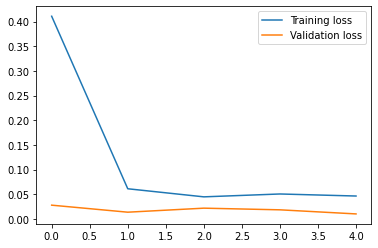

In [155]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)
model.save(stock_symbol+'.h5')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [156]:
n_future=15
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_future, freq='1d').tolist()
prediction = model.predict(trainX[-n_future:])
prediction

array([[0.743634  ],
       [0.7635542 ],
       [0.77552676],
       [0.77762043],
       [0.7794503 ],
       [0.7840911 ],
       [0.7851724 ],
       [0.7825944 ],
       [0.76855195],
       [0.7520671 ],
       [0.7393288 ],
       [0.72448236],
       [0.70564634],
       [0.6858456 ],
       [0.6731256 ]], dtype=float32)

In [158]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,3]

In [159]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

In [160]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Close':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])
df_forecast.index=df_forecast['Date']
df_forecast

,Date,Close
Date,,
2022-06-03,2022-06-03,459.266357
2022-06-04,2022-06-04,461.622742
2022-06-05,2022-06-05,463.039001
2022-06-06,2022-06-06,463.286652
2022-06-07,2022-06-07,463.503113
2022-06-08,2022-06-08,464.052094
2022-06-09,2022-06-09,464.179993
2022-06-10,2022-06-10,463.875031
2022-06-11,2022-06-11,462.213928


In [161]:
original=df[['Date','Close']]
original['Date']=pd.to_datetime(original['Date'])
original.index=original['Date']
original=original.drop(['Date'],axis=1)
original=original.tail(n_future)
original


C:\Users\NEHA RAJESH\AppData\Local\Temp\ipykernel_14376\3244569456.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close
Date,
2022-06-02,469.850006
2022-06-03,464.500000
2022-06-06,463.700012
2022-06-07,463.399994
2022-06-08,471.299988
2022-06-09,466.950012
2022-06-10,461.850006
2022-06-13,445.850006
2022-06-14,448.100006


In [162]:
df_forecast['Actual']=original['Close']
df_forecast=df_forecast.dropna()
# df_forecast=df_forecast.drop(['Date'],axis=1)
df_forecast

,Date,Close,Actual
Date,,,
2022-06-03,2022-06-03,459.266357,464.500000
2022-06-06,2022-06-06,463.286652,463.700012
2022-06-07,2022-06-07,463.503113,463.399994
2022-06-08,2022-06-08,464.052094,471.299988
2022-06-09,2022-06-09,464.179993,466.950012
2022-06-10,2022-06-10,463.875031,461.850006
2022-06-13,2022-06-13,458.757080,445.850006
2022-06-14,2022-06-14,457.000885,448.100006
2022-06-15,2022-06-15,454.772736,451.350006


In [163]:
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

In [164]:
fig = px.line( df_forecast,
                        x=df_forecast.index,
                        y=['Close','Actual'],
                        title="Prediction for next {0} days".format(n_future),
                        labels=dict(variable="Prediction"))
fig.update_yaxes(title_text='Prices in ₹')
fig.update_xaxes(title_text='n Day')
fig